In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.special import expit

# Reward functions

In [20]:
def h(p):
    return - p * np.log(p)-(1-p) * np.log(1-p)

In [21]:
def only_reward(p, x):
    return p*x

def reward_and_certainty(p, x):
    return p*x * (1-h(p))

In [22]:
def prospect_reward(p, x, gamma=0.8, alpha=0.1):
    return np.exp(-(-np.log(p)) ** gamma)*x**(1-alpha)

# Produce data

In [23]:
# Seed
np.random.seed(123)

# Number of trials
n_trial = 100

# Number of lottery/option per trial
n_option = 2

p = np.random.random(size=(n_option, n_trial))
x = np.random.random(size=(n_option, n_trial))

In [24]:
data = {
    "tau": 0.1,
    "n_trial": n_trial,
    "n_option": n_option,
    "p": p,
    "x": x,
}

# Optimize

In [25]:
EPS = np.finfo(float).eps

def objective(param, data, reward):
    
    alpha, gamma = param
    
    p = data["p"]
    x = data["x"]
    tau = data["tau"]

    sp = np.exp(-(-np.log(p)) ** gamma)
    
    su = x ** (1 - alpha)
    
    seu = sp * su
    
    p_choice = np.exp(seu/tau)
    p_choice /= p_choice.sum(axis=0)
    
    r = 0
    for i in range(n_trial):
        c = np.random.choice(np.arange(n_option), p=p_choice[:, i])
        r += reward(p=p[c, i], x=x[c, i])
        
    return -r

In [26]:
# Define bounds and an initial guess
bounds = (-3, 0.75), (0.25, 4)
init_guess = (0, 1,)

# Run the optimizer
res = scipy.optimize.minimize(
    fun=objective,
    x0=init_guess,
    bounds=bounds,
    args=(data, reward_and_certainty))
res

      fun: -16.670527803511103
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-16407969.99660681, -47193897.32739012])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 3
     njev: 32
   status: 0
  success: True
        x: array([2.85828877e-06, 1.00001095e+00])

A '[OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)' is returned. It contains:
* `fun` (NumPy array): Value of objective function.
* `hess_inv` (object): Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator. Here, it is a scipy.sparse.linalg.LinearOperator.
* `jac` (NumPy array): Value of the Jacobian.
* `nfev` (int): Number of evaluations of the objective functions.
* `message` (str): Description of the cause of the termination.
* `nit` (int): Number of iterations performed by the optimizer.
* `njev` (int): Number of evaluations of the objective functions and of its Jacobian.
* `status` (int): Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.
* `success` (bool): Whether or not the optimizer exited successfully.
* `x` (NumPy array): the solution of the optimization.

In [27]:
# Extract the best param and best value 
best_param = res.x
best_value = res.fun

print("Estimation parameters: ", best_param)
print("LLS: ", - best_value)

Estimation parameters:  [2.85828877e-06 1.00001095e+00]
LLS:  16.670527803511103


# Plot

In [28]:
alpha_est, gamma_est = res.x

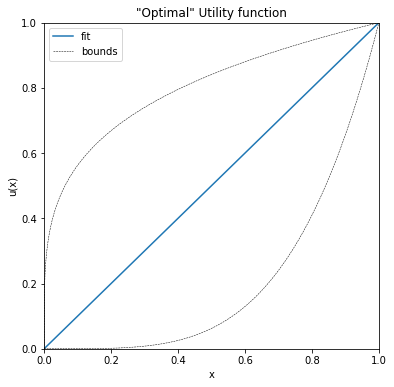

In [29]:
# Utility function
def f(x, alpha):
    return x**(1-alpha)

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 1000)

# Plot estimate
ax.plot(x, f(x, alpha_est), label="fit")

# Plot truth
# ax.plot(x, f(x, alpha_true), ls=':', label='true', color="red")

# Plot bounds
ax.plot(x, f(x, bounds[0][0]), color='0.01', ls='--', lw=0.5, label="bounds")
ax.plot(x, f(x, bounds[0][1]), color='0.01', ls='--', lw=0.5)

# Pimp your plot
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('"Optimal" Utility function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

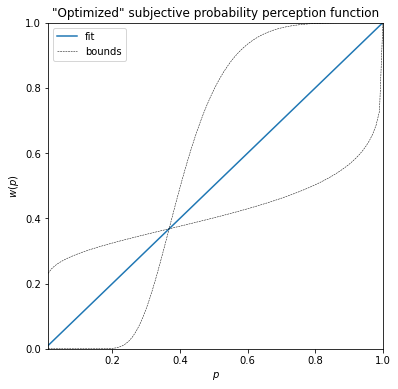

In [30]:
# Probability perception function
def f(x, gamma):
    return np.exp(-(-np.log(x)) ** gamma)

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = 0.01, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot mean
ax.plot(x, f(x, gamma_est), label="fit")

# Plot truth
# ax.plot(x, f(x, gamma_true), ls=':', label='true', color="red")

# Plot bounds
ax.plot(x, f(x, bounds[1][0]), color='0.01', ls='--', lw=0.5, label="bounds")
ax.plot(x, f(x, bounds[1][1]), color='0.01', ls='--', lw=0.5)

# Pimp your plot
ax.set_xlabel('$p$')
ax.set_ylabel('$w(p)$')
ax.set_title('"Optimized" subjective probability perception function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.legend()
plt.show()

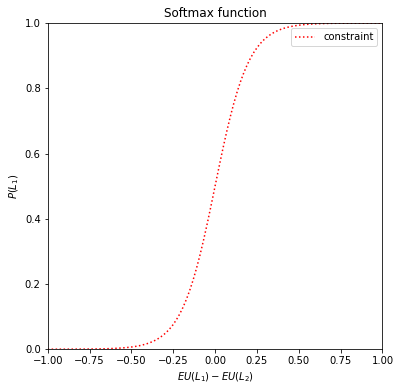

In [31]:
# Softmax function given the difference of value between 2 options
def f(x, tau):
    return expit(x/tau)

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = -1, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot estimate
# ax.plot(x, f(x, tau_est), label="fit")

# Plot truth
ax.plot(x, f(x, data["tau"]), ls=':', label='constraint', color="red")

# Pimp your plot
ax.set_xlabel('$EU(L_1) - EU(L_2)$')
ax.set_ylabel('$P(L_1)$')
ax.set_title('Softmax function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

# Juechems et al. (2021)

## Reward functions

In [32]:
def h(p):
    return - p * np.log(p)-(1-p) * np.log(1-p)

In [33]:
def reward_only(p, x):
    return p*x

def reward_and_certainty(p, x):
    return p*x * (1-h(p))

In [34]:
def prospect_reward(p, x, gamma=0.8, alpha=0.1):
    return np.exp(-(-np.log(p)) ** gamma)*x**(1-alpha)

## Produce material

In [35]:
# Seed
np.random.seed(123)

# Number of trials
n_trial = 100

# Number of lottery/option per trial
n_option = 2

steps = np.linspace(0.01,0.99, 10)

In [36]:
import itertools as it
import pandas as pd

In [37]:
task = pd.DataFrame(np.array(list(it.product(steps, repeat=4))), columns=["p0", "x0", "p1", "x1"])
task

,p0,x0,p1,x1
0,0.01,0.01,0.01,0.010000
1,0.01,0.01,0.01,0.118889
2,0.01,0.01,0.01,0.227778
3,0.01,0.01,0.01,0.336667
4,0.01,0.01,0.01,0.445556
...,...,...,...,...
9995,0.99,0.99,0.99,0.554444
9996,0.99,0.99,0.99,0.663333
9997,0.99,0.99,0.99,0.772222
9998,0.99,0.99,0.99,0.881111


In [38]:
task = task[~((task.p0 > task.p1) & (task.x0 > task.x1))]
task = task[~((task.p1 > task.p0) & (task.x1 > task.x0))]
task.reset_index(inplace=True, drop=True)
task

,p0,x0,p1,x1
0,0.01,0.01,0.01,0.010000
1,0.01,0.01,0.01,0.118889
2,0.01,0.01,0.01,0.227778
3,0.01,0.01,0.01,0.336667
4,0.01,0.01,0.01,0.445556
...,...,...,...,...
5945,0.99,0.99,0.99,0.554444
5946,0.99,0.99,0.99,0.663333
5947,0.99,0.99,0.99,0.772222
5948,0.99,0.99,0.99,0.881111


In [39]:
p = np.vstack((task.p0.values, task.p1.values)).T
x = np.vstack((task.x0.values, task.x1.values)).T
n_trial, n_option = p.shape
data = {
    "p_steps": steps,
    "x_steps": steps,
    "tau": 0.1,
    "n_trial": n_trial,
    "n_option": n_option,
    "p": p,
    "x": x,
}

In [40]:
def objective(param, data, reward):
    
    p = data["p"]
    x = data["x"]
    tau = data["tau"]
    x_steps = data["x_steps"]
    p_steps = data["p_steps"]
    n_trial = data["n_trial"]
    n_option = data["n_option"]
    
    suf = dict(zip(x_steps, param[:len(x_steps)]))
    spf = dict(zip(p_steps, param[len(x_steps):]))
    
    su = np.zeros((n_trial, n_option))
    sp = np.zeros((n_trial, n_option))
    
    for i in range(n_trial):
        for j in range(n_option):
            su[i, j] = suf[x[i, j]]
            sp[i, j] = spf[p[i, j]]
            
    seu = sp * su
    
    p_choice = np.exp(seu.T/tau)
    p_choice /= p_choice.sum(axis=0)
    p_choice = p_choice.T
    
    r = np.zeros(n_trial)
    for i in range(n_trial):
        
        # c = int(p_choice[1] > p_choice[0])
        c = np.random.choice(np.arange(n_option), p=p_choice[i])
        r[i] = reward(p=p[i, c], x=x[i, c])
        
    return - r.sum()

In [42]:
# Define bounds and an initial guess
n_param = len(data["x_steps"]) + len(data["p_steps"])
bounds = [(0., 1.) for _ in range(n_param)]
init_guess = np.hstack((data["x_steps"], data["p_steps"]))

# Run the optimizer
res = scipy.optimize.minimize(
    fun=objective,
    x0=init_guess,
    bounds=bounds,
    args=(data, reward_only))
# res = scipy.optimize.differential_evolution(
#     func=objective,
#     # x0=init_guess,
#     bounds=bounds,
#     args=(task, reward_only))
res

      fun: -1731.5388740740736
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.28803457e+08, -1.91100000e+08, -5.48800000e+07,  6.00086667e+08,
       -6.27804939e+07,  6.20134318e+08,  6.51458021e+08,  7.37782712e+07,
       -2.66608394e+08, -1.24012345e+07,  1.58360741e+08,  2.20536296e+08,
       -2.90140494e+08, -7.05358025e+07, -4.60237037e+07,  1.77307407e+08,
        2.53541727e+08,  2.74206418e+08, -2.19072345e+08,  3.59853578e+08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 525
      nit: 2
     njev: 25
   status: 0
  success: True
        x: array([0.01      , 0.1188891 , 0.22777796, 0.33666659, 0.44555545,
       0.55444431, 0.66333318, 0.77222204, 0.88111114, 0.99      ,
       0.01000023, 0.11888886, 0.22777772, 0.33666682, 0.44555569,
       0.55444455, 0.66333341, 0.77222204, 0.8811109 , 0.99      ])

A '[OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)' is returned. It contains:
* `fun` (NumPy array): Value of objective function.
* `hess_inv` (object): Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator. Here, it is a scipy.sparse.linalg.LinearOperator.
* `jac` (NumPy array): Value of the Jacobian.
* `nfev` (int): Number of evaluations of the objective functions.
* `message` (str): Description of the cause of the termination.
* `nit` (int): Number of iterations performed by the optimizer.
* `njev` (int): Number of evaluations of the objective functions and of its Jacobian.
* `status` (int): Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.
* `success` (bool): Whether or not the optimizer exited successfully.
* `x` (NumPy array): the solution of the optimization.

In [43]:
su = res.x[:len(data["x_steps"])]
sp = res.x[len(data["x_steps"]):]

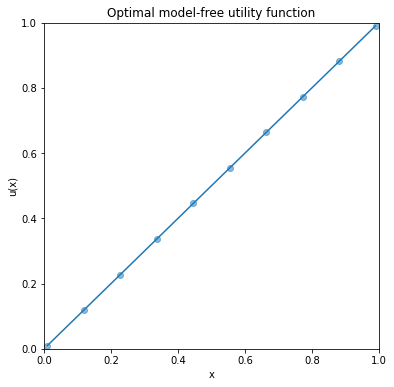

In [44]:
# Model-free utility function

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Plot estimate
ax.plot(data["x_steps"], su)

# Pimp your plot
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('Optimal model-free utility function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

coord = np.vstack((data["x_steps"], su))
ax.scatter(coord[0], coord[1], alpha=0.5)

plt.show()

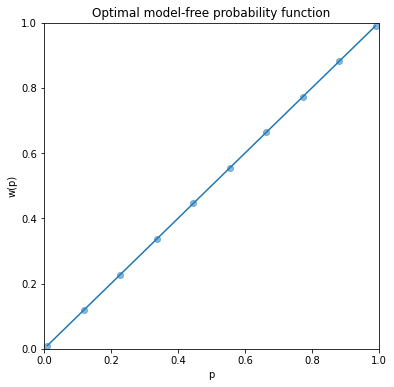

In [45]:
# Model-free probability function

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Plot estimate
ax.plot(data["p_steps"], sp)

# Pimp your plot
ax.set_xlabel('p')
ax.set_ylabel('w(p)')
ax.set_title('Optimal model-free probability function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

coord = np.vstack((data["p_steps"], sp))
ax.scatter(coord[0], coord[1], alpha=0.5)

plt.show()

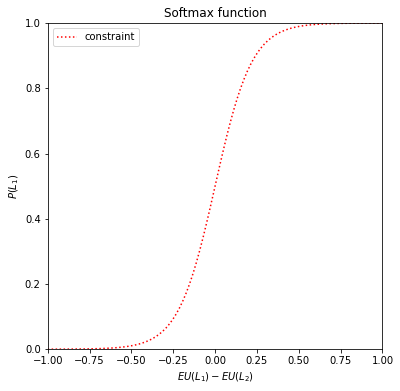

In [9]:
tau = 0.11

# Softmax function given the difference of value between 2 options
def f(x, tau):
    return expit(x/tau)

# Create fig
fig, ax = plt.subplots(figsize=(6, 6))

# Set limits
x_min, x_max = -1, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot estimate
# ax.plot(x, f(x, tau_est), label="fit")

# Plot truth
ax.plot(x, f(x, tau), ls=':', label='constraint', color="red")

# Pimp your plot
ax.set_xlabel('$EU(L_1) - EU(L_2)$')
ax.set_ylabel('$P(L_1)$')
ax.set_title('Softmax function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

In [ ]:
# p = np.array([sorted(np.random.choice(steps, size=n_option, replace=False)) for _ in range(n_trial)])
# x = np.array([sorted(np.random.choice(steps, size=n_option, replace=False), reverse=True) for _ in range(n_trial)])
# data = {
#     "p_steps": steps,
#     "x_steps": steps,
#     "tau": 0.1,
#     "n_trial": n_trial,
#     "n_option": n_option,
#     "p": p,
#     "x": x,
# }
# def objective(param, task, reward):
    
#     p = data["p"]
#     x = data["x"]
#     tau = data["tau"]
#     x_steps = data["x_steps"]
#     p_steps = data["p_steps"]
#     n_trial = data["n_trial"]
#     n_option = data["n_option"]
    
#     suf = dict(zip(x_steps, param[:len(x_steps)]))
#     spf = dict(zip(p_steps, param[len(x_steps):]))
    
#     su = np.zeros((n_trial, n_option))
#     sp = np.zeros((n_trial, n_option))
    
#     for i in range(n_trial):
#         for j in range(n_option):
#             su[i, j] = suf[x[i, j]]
#             sp[i, j] = spf[p[i, j]]
            
#     seu = sp * su
    
#     r = np.zeros(n_trial)
#     for i in range(n_trial):
        
#         p_choice = np.exp(seu[i]/tau)
#         p_choice /= p_choice.sum()
#         # c = int(p_choice[1] > p_choice[0])
#         c = np.random.choice(np.arange(n_option), p=p_choice)
#         r[i] = reward(p=p[i, c], x=x[i, c])
        
#     return - r.sum()